In [1]:
#For the following exercises, you'll need to load several datasets using the pydataset library. (If you get an error when trying to run the import below, use pip to install the pydataset package.)

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from pydataset import data

In [4]:
#When the instructions say to load a dataset, you can pass the name of the dataset as a string to the data function to load the dataset. You can also view the documentation for the data set by passing the show_doc keyword argument.

#mpg = data('mpg') # load the dataset and store it in a variable
# data('mpg', show_doc=True) # view the documentation for the dataset

## Problem 1

In [5]:
#1. Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [6]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [7]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [8]:
# On average, which manufacturer has the best miles per gallon?
mpg['average_mileage'] = (mpg.cty + mpg.hwy) / 2
mpg.groupby('manufacturer').average_mileage.mean().sort_values(ascending=False).idxmax()

'honda'

In [9]:
# How many different manufacturers are there?
mpg.manufacturer.nunique()

15

In [10]:
# How many different models are there?
mpg.model.nunique()

38

In [11]:
# Do automatic or manual cars have better miles per gallon?
mpg['trans_category'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')
mpg.groupby('trans_category')[['cty', 'hwy']].mean()

,cty,hwy
trans_category,,
auto,15.968153,22.292994
manual,18.675325,25.779221


## Problem 2

In [12]:
#2. Joining and Merging

In [13]:
# Copy the users and roles dataframes from the examples above. 

In [14]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [15]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [16]:
# What do you think a right join would look like? An outer join? 

In [17]:
right_join = pd.merge(users, 
                    roles, 
                    left_on='role_id', 
                    right_on='id', 
                    how='right').drop(columns='role_id').rename(columns={'id_x': 'id', 
                                                                         'name_x': 'employee',
                                                                         'id_y': 'role_id',
                                                                         'name_y': 'role'}
                                                                )
right_join

,id,employee,role_id,role
0,1.0,bob,1,admin
1,2.0,joe,2,author
2,3.0,sally,3,reviewer
3,4.0,adam,3,reviewer
4,NaN,NaN,4,commenter


In [18]:
outer_join = pd.merge(users, 
         roles, 
         left_on='role_id', 
         right_on='id', 
         how='outer').drop(columns='role_id').rename(columns={'id_x': 'id', 
                                                            'name_x': 'employee',
                                                            'id_y': 'role_id',
                                                            'name_y': 'role'}
                                                    )
outer_join

,id,employee,role_id,role
0,1.0,bob,1.0,admin
1,2.0,joe,2.0,author
2,3.0,sally,3.0,reviewer
3,4.0,adam,3.0,reviewer
4,5.0,jane,NaN,NaN
5,6.0,mike,NaN,NaN
6,NaN,NaN,4.0,commenter


In [19]:
# What happens if you drop the foreign keys from the dataframes and try to merge them?

In [20]:
users_drop = users.drop(columns='role_id')
users_drop

,id,name
0,1,bob
1,2,joe
2,3,sally
3,4,adam
4,5,jane
5,6,mike


## Problem 3

In [21]:
#3. Getting data from SQL databases

In [22]:
#a. Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

In [23]:
from env import host, username, password

In [24]:
def get_db_url(db, username=username, host=host, password=password):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

In [25]:
#b. Use your function to obtain a connection to the employees database.

In [26]:
sql_query = 'SELECT * FROM employees'

In [27]:
employees = pd.read_sql(sql_query, get_db_url('employees'))

In [28]:
employees.to_csv('employees.csv')

In [29]:
employees = pd.read_csv('employees.csv', index_col=0)
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [30]:
#c. Once you have successfully run a query:

In [31]:
# Intentionally make a typo in the database url. What kind of error message do you see?

- You get this: 
    "OperationalError: (pymysql.err.OperationalError) (1044, "Access denied for user 'darden_1037'@'%' to database 'titles'")"


In [32]:
# sql_query = 'SELECT * FROM titles'

# titles = pd.read_sql(sql_query, get_db_url('titles'))
# titles.head()

In [33]:
# Intentionally make an error in your SQL query. What does the error message look like?

- You get this:
    "ProgrammingError: (pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '' at line 1")"

In [34]:
# sql_query = 'SELECT # FORM titles'

# titles = pd.read_sql(sql_query, get_db_url('employees'))
# titles.head()

In [35]:
#d. Read the employees and titles tables into two separate dataframes
sql_query = 'SELECT * FROM titles'
titles = pd.read_sql(sql_query, get_db_url('employees'))
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [36]:
#e. Visualize the number of employees with each title.

In [37]:
current_bool = titles.to_date == titles.to_date.max()

In [38]:
current_employee_titles = titles[current_bool]

In [39]:
current_title_values = current_employee_titles.title.value_counts()

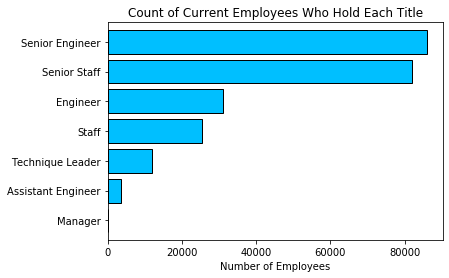

In [40]:
current_title_values.plot.barh(color='deepskyblue', 
                               ec='black', 
                               width=.8)

plt.title('Count of Current Employees Who Hold Each Title')
plt.xlabel('Number of Employees')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()

plt.show()

In [41]:
#f. Join the employees and titles dataframes together.

In [42]:
employees.shape

(300024, 6)

In [43]:
titles.shape

(443308, 4)

In [44]:
all_emp_titles = employees.merge(titles, on='emp_no')
all_emp_titles.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


In [45]:
all_emp_titles.shape

(443308, 9)

In [46]:
#g. Visualize how frequently employees change titles.

In [47]:
changes = all_emp_titles.emp_no.value_counts()

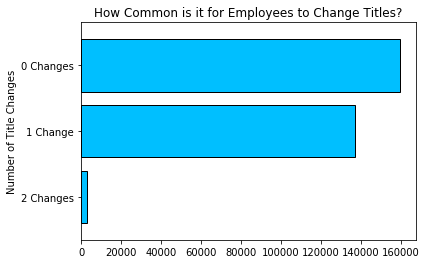

In [48]:
changes.value_counts().plot(kind='barh', 
                            color='deepskyblue', 
                            ec='black', 
                            width=.8)

plt.title('How Common is it for Employees to Change Titles?')
plt.ylabel('Number of Title Changes')
plt.yticks(ticks=[0,1,2], labels=['0 Changes', '1 Change', '2 Changes'])

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()

plt.show()

In [49]:
#h. For each title, find the hire date of the employee that was hired most recently with that title.

In [50]:
all_emp_titles.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

In [51]:
#i. Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

In [52]:
dept_title_query = '''

                    SELECT t.emp_no, 
                    t.title, 
                    t.from_date, 
                    t.to_date, 
                    d.dept_name 
                    FROM departments AS d 
                    JOIN dept_emp AS de USING(dept_no) 
                    JOIN titles AS t USING(emp_no);

                    '''

In [53]:
dept_titles = pd.read_sql(dept_title_query, get_db_url('employees'))

In [54]:
current_titles = dept_titles[dept_titles.to_date == dept_titles.to_date.max()]

In [55]:
current_titles_crosstab = pd.crosstab(current_titles.dept_name, current_titles.title)
current_titles_crosstab

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,12349,3902,241
Development,1833,15677,1,43364,1085,315,6117
Finance,0,0,1,0,10650,3199,0
Human Resources,0,0,1,0,10843,3416,0
Marketing,0,0,1,0,12371,3880,0
Production,1542,13325,1,37156,1123,349,5210
Quality Management,433,3744,1,10390,0,0,1422
Research,77,830,1,2250,10219,3206,321
Sales,0,0,1,0,32032,9967,0


## Problem 4

In [56]:
#4. Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [57]:
chipotle_sql_query = '''
                     SELECT *
                     FROM orders;
                     '''

In [58]:
orders = pd.read_sql(chipotle_sql_query, get_db_url('chipotle'))
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [59]:
orders.shape

(4622, 6)

In [60]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


In [61]:
# What is the total price for each order?

In [62]:
orders['item_price'] = orders.item_price.str.replace('$', '').astype(float)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4622 non-null   int64  
 1   order_id            4622 non-null   int64  
 2   quantity            4622 non-null   int64  
 3   item_name           4622 non-null   object 
 4   choice_description  4622 non-null   object 
 5   item_price          4622 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 216.8+ KB


In [63]:
order_totals = orders.groupby('order_id').item_price.sum()
order_totals.sample(10)

order_id
505     12.20
20      36.20
1359    12.50
199     21.95
1474    22.50
1646    22.50
743     13.20
600     12.75
1105    13.70
267     10.08
Name: item_price, dtype: float64

In [64]:
# What are the most popular 3 items?

In [65]:
top_three = orders.groupby('item_name').quantity.sum().sort_values(ascending=False).head(3)
top_three

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

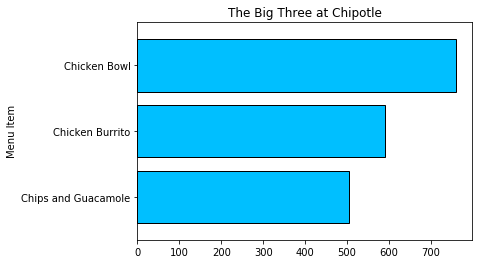

In [66]:
top_three.plot(kind='barh',
             color='deepskyblue', 
             ec='black', 
             width=.8)

plt.title('The Big Three at Chipotle')
plt.ylabel('Menu Item')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()

plt.show()


In [67]:
# Which item has produced the most revenue?

In [68]:
orders.groupby('item_name').item_price.sum().sort_values(ascending=False).head(1)

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64

## Extra Pandas Exercises and Resources

In [69]:
#https://www.w3resource.com/python-exercises/pandas/index.php
#https://towardsdatascience.com/20-pandas-functions-that-will-boost-your-data-analysis-process-f5dfdb2f9e05
#https://github.com/guipsamora/pandas_exercises
#https://github.com/ajcr/100-pandas-puzzles

## More Practice!

In [70]:
#For even more practice with pandas, you can do the exercises from the SQL module, but instead of using SQL to do the aggregation, sorting, joining, etc, use pandas. That is, read the data from all of the tables into pandas dataframes and manipulate the dataframes.